# Importing necessary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#pip install --user imblearn

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,zero_one_loss  


from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier

# Reading the dataset and analysing it

In [4]:
df=pd.read_csv("C:/Users/Hp/Datasets/ML Algorithm Visualizer/healthcare-dataset-stroke-data.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.shape

(5110, 12)

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Preprocessing

In [9]:
df.drop(['id'], axis=1, inplace=True) #inplace=true means  , do changes in same dataframe and dont create a new one

In [10]:
df['hypertension'] = df['hypertension'].map({0:'No',1:'Yes'})
df['heart_disease'] = df['heart_disease'].map({0:'No',1:'Yes'})

In [11]:
missing_value_count = df.isnull().sum() #Nan=null
missing_value_count

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)#Filling na values with mean of bmi column

In [13]:
df['bmi'].isnull().sum()


0

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [15]:
df.to_csv('clean_data.csv',index=False) 

# Understanding features and its categories

In [16]:
#counting value of each category in each feature
print(df["gender"].value_counts()) 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [17]:
print(df["hypertension"].value_counts())

No     4612
Yes     498
Name: hypertension, dtype: int64


In [18]:
print(df["heart_disease"].value_counts())

No     4834
Yes     276
Name: heart_disease, dtype: int64


In [19]:
print(df["ever_married"].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


In [20]:
print(df["work_type"].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [21]:
print(df["Residence_type"].value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [22]:
print(df["smoking_status"].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [23]:
print(df["stroke"].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


# Visualisation

In [24]:
corr_matrix=df.corr()
corr_matrix

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.325942,0.245257
avg_glucose_level,0.238171,1.000000,0.168751,0.131945
bmi,0.325942,0.168751,1.000000,0.038947
stroke,0.245257,0.131945,0.038947,1.000000


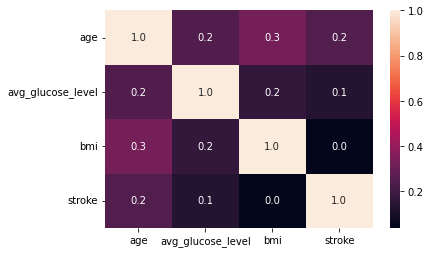

In [25]:
sn.heatmap(corr_matrix,
            annot = True,
            fmt = '.1f')
plt.show()

In [26]:
corr_matrix['stroke'].sort_values(ascending = False)  #Age is highly correlated with stroke

stroke               1.000000
age                  0.245257
avg_glucose_level    0.131945
bmi                  0.038947
Name: stroke, dtype: float64

# Converting categorical data to numeric(int)

In [27]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [28]:
object_col = ['gender','hypertension','heart_disease', 'ever_married', 'work_type','Residence_type','smoking_status']
label_encoder = preprocessing.LabelEncoder()
for col in object_col:
    df[col]=  label_encoder.fit_transform(df[col])

In [29]:
df.to_csv("Encoded_data.csv")

In [30]:
#counting value of each category in each feature
print(df["gender"].value_counts()) 

0    2994
1    2115
2       1
Name: gender, dtype: int64


In [31]:
print(df["hypertension"].value_counts())

0    4612
1     498
Name: hypertension, dtype: int64


In [32]:
print(df["Residence_type"].value_counts())

1    2596
0    2514
Name: Residence_type, dtype: int64


In [33]:
print(df["heart_disease"].value_counts())

0    4834
1     276
Name: heart_disease, dtype: int64


In [34]:
print(df["ever_married"].value_counts())

1    3353
0    1757
Name: ever_married, dtype: int64


In [35]:
print(df["work_type"].value_counts())

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64


In [36]:
print(df["smoking_status"].value_counts())

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


In [37]:
# Encoding Categorical Columns
# object_col=['gender','hypertension','heart_disease', 'ever_married', 'work_type','Residence_type','smoking_status']
# for col in object_col:
#     dummy = pd.get_dummies(df[col],prefix=col)
#     df = pd.concat([df,dummy],axis=1)
#     del df[col]

In [38]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [39]:
# df = pd.get_dummies(df)
# df.head(2)

In [40]:
df.shape

(5110, 11)

# Dividing Dataset on basis of Independent and Dependent Variables

In [86]:
x = df.drop(columns = ['stroke'])
y = df['stroke']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


# Balancing Dataset as there is imbalance between Majority and minority classes

In [42]:
sm = SMOTE(random_state=123)
x_sm , y_sm = sm.fit_resample(x,y)

print(f'''Shape of X before SMOTE:{x.shape}
Shape of X after SMOTE:{x_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 10)
Shape of X after SMOTE:(9722, 10) 


Target Class distributuion before SMOTE:
0    0.951272
1    0.048728
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


# Splitting of data into training and testing

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size = .2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7777, 10), (7777,), (1945, 10), (1945,))

# Feature scaling : So that model remain unbiased

In [44]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Using different Binary Classification Algorithms to find cross validation scores in order to check for over/under fitting

In [45]:
classifier_nb = GaussianNB()  
classifier_nb.fit(x_train, y_train)  

GaussianNB()

In [46]:
accuracy_nb = cross_val_score(classifier_nb, x, y, scoring='accuracy', cv = 10)
accuracy_nb=accuracy_nb.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_nb)

Accuracy of Model with Cross Validation is: 86.67318982387476


In [47]:
classifier_lr = LogisticRegression(solver='liblinear')   #? liblinear
classifier_lr.fit(x_train, y_train)  

LogisticRegression(solver='liblinear')

In [48]:
accuracy_lr = cross_val_score(classifier_lr, x, y, scoring='accuracy', cv = 10)
accuracy_lr=accuracy_lr.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_lr)

Accuracy of Model with Cross Validation is: 95.10763209393346


In [49]:
classifier_svc = SVC()  
classifier_svc.fit(x_train, y_train)  

SVC()

In [50]:
accuracy_svc = cross_val_score(classifier_svc, x, y, scoring='accuracy', cv = 10)
accuracy_svc=accuracy_svc.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_svc)

Accuracy of Model with Cross Validation is: 95.12720156555773


In [51]:
classifier_dt = tree.DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)  

DecisionTreeClassifier()

In [52]:
accuracy_dt = cross_val_score(classifier_dt, x, y, scoring='accuracy', cv = 10)
accuracy_dt= accuracy_dt.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_dt)

Accuracy of Model with Cross Validation is: 91.25244618395305


In [53]:
classifier_bc = BaggingClassifier()
classifier_bc.fit(x_train, y_train)  

BaggingClassifier()

In [54]:
accuracy_bc = cross_val_score(classifier_bc, x, y, scoring='accuracy', cv=10)
accuracy_bc = accuracy_bc.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_bc)

Accuracy of Model with Cross Validation is: 94.81409001956946


In [55]:
classifier_gbc = GradientBoostingClassifier()
classifier_gbc.fit(x_train, y_train)
# pred=classifier.predict(x_test)
# print("0-1 Loss:"+str(np.round(zero_one_loss(pred,y_test))))

GradientBoostingClassifier()

In [56]:
accuracy_gbc = cross_val_score(classifier_gbc, x, y, scoring='accuracy', cv=10)
accuracy_gbc = accuracy_gbc.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_gbc )

Accuracy of Model with Cross Validation is: 94.89236790606653


In [57]:
classifier_knn = KNeighborsClassifier(n_neighbors = 10)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
accuracy_knn = cross_val_score(classifier_knn, x, y, scoring='accuracy', cv=10)
accuracy_knn = accuracy_knn.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_knn)

Accuracy of Model with Cross Validation is: 95.0293542074364


In [59]:
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [60]:
accuracy_rf = cross_val_score(classifier_rf, x, y, scoring='accuracy', cv=10)
accuracy_rf = accuracy_rf.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_rf )

Accuracy of Model with Cross Validation is: 94.99021526418785


In [61]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 =  KNeighborsClassifier(n_neighbors = 10)
classifier_vc = VotingClassifier(estimators=[('gbc', clf1), ('rfc', clf2), ('knn', clf3)], voting='soft')
classifier_vc.fit(x_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [62]:
accuracy_vc = cross_val_score(classifier_vc, x, y, scoring='accuracy', cv=10)
accuracy_vc = accuracy_vc.mean() * 100
print("Accuracy of Model with Cross Validation is:",accuracy_vc)

Accuracy of Model with Cross Validation is: 95.04892367906065


In [63]:
# def create_baseline():
#     # create model
#     model = Sequential()
#     model.add(Dense(60, input_dim=60, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# Visualising all cross-validation scores

<AxesSubplot:>

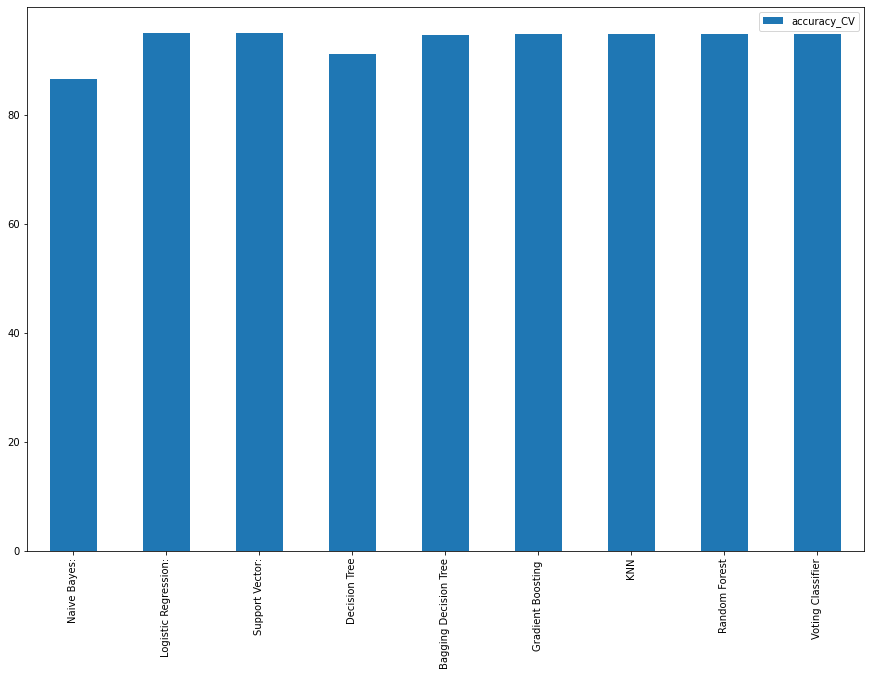

In [64]:
model_compare = pd.DataFrame({"Naive Bayes:":accuracy_nb,
                             "Logistic Regression:":accuracy_lr,
                             "Support Vector:":accuracy_svc,
                              "Decision Tree":accuracy_dt,
                              "Bagging Decision Tree":accuracy_bc,
                              "Gradient Boosting ":accuracy_gbc,
                              "KNN":accuracy_knn,
                              "Random Forest": accuracy_rf,
                              "Voting Classifier":accuracy_vc
                             },index=["accuracy_CV"])
model_compare.T.plot.bar(figsize=(15,10))

# Finding accuracies

In [65]:
#prediction on NB
y_pred=classifier_nb.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_nb = accuracy_score(y_pred,y_test)
print(acc_score_nb)

[1 1 1 ... 0 1 1]
0.8133676092544987


In [66]:
#prediction on LR
y_pred=classifier_lr.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_lr = accuracy_score(y_pred,y_test)
print(acc_score_lr)

[0 1 1 ... 0 1 1]
0.8087403598971722


In [67]:
#prediction on SVC
y_pred=classifier_svc.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_svc = accuracy_score(y_pred,y_test)
print(acc_score_svc)

[1 1 1 ... 0 1 1]
0.8658097686375321


In [68]:
#prediction on DT
y_pred=classifier_dt.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_dt = accuracy_score(y_pred,y_test)
print(acc_score_dt)

[1 1 1 ... 0 1 1]
0.9110539845758355


In [69]:
#prediction on Bagging Classifier
y_pred=classifier_bc.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_bc = accuracy_score(y_pred,y_test)
print(acc_score_bc)

[0 1 1 ... 0 1 1]
0.9439588688946016


In [70]:
#prediction on Gradient Boosting Classifier
y_pred=classifier_gbc.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_gbc = accuracy_score(y_pred,y_test)
print(acc_score_gbc)

[1 1 1 ... 0 1 1]
0.8838046272493574


In [71]:
#prediction on KNN
y_pred=classifier_knn.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_knn = accuracy_score(y_pred,y_test)
print(acc_score_knn)

[0 1 1 ... 0 1 1]
0.8673521850899742


In [72]:
#prediction on Random Forest
y_pred=classifier_rf.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_rf = accuracy_score(y_pred,y_test)
print(acc_score_rf)

[1 1 1 ... 0 1 1]
0.9501285347043702


In [73]:
#prediction on Voting classifier
y_pred=classifier_vc.predict(x_test)
print(y_pred)
cm=confusion_matrix(y_pred,y_test)
acc_score_vc = accuracy_score(y_pred,y_test)
print(acc_score_vc)

[1 1 1 ... 0 1 1]
0.9218508997429306


<AxesSubplot:>

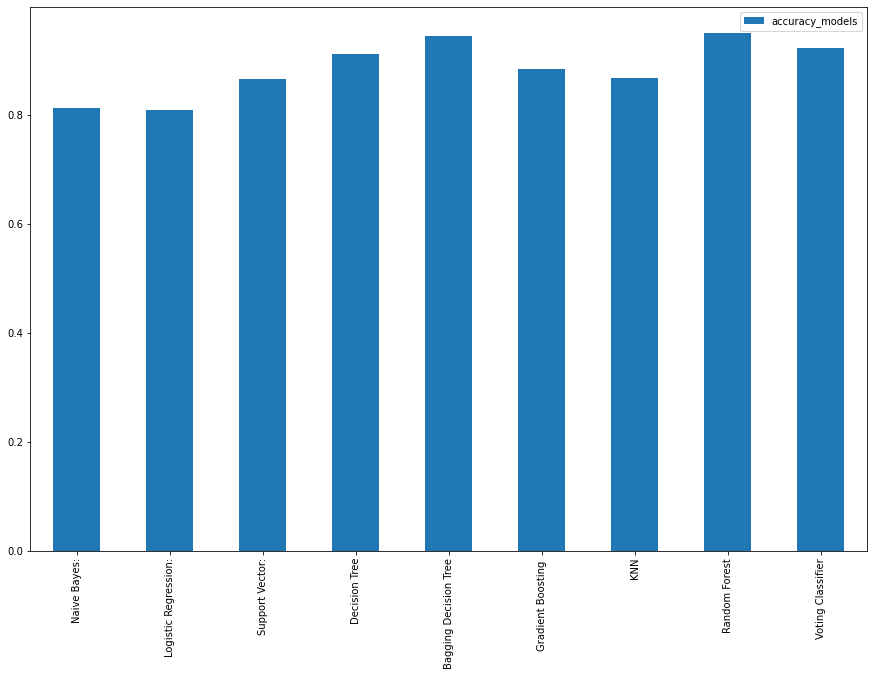

In [74]:
model_compare = pd.DataFrame({"Naive Bayes:":acc_score_nb,
                             "Logistic Regression:":acc_score_lr,
                             "Support Vector:":acc_score_svc,
                              "Decision Tree":acc_score_dt,
                              "Bagging Decision Tree":acc_score_bc,
                              "Gradient Boosting ":acc_score_gbc,
                              "KNN":acc_score_knn,
                              "Random Forest": acc_score_rf,
                              "Voting Classifier":acc_score_vc
                             },index=["accuracy_models"])
model_compare.T.plot.bar(figsize=(15,10))

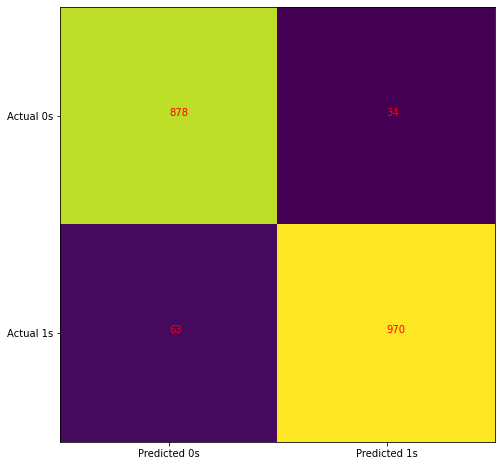

In [75]:
#prediction on Random Forest
y_pred=classifier_rf.predict(x_test)
cm=confusion_matrix(y_pred,y_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
         ax.text(j, i, cm[i, j],color='red')
plt.show()

In [76]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# fn=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
# cn=[1,0]
# plot_tree(str(classifier_rf.estimators_[0]), 
#           feature_names=fn,
#           class_names=list(cn), 
#           filled=True, impurity=True, 
#           rounded=True)

In [77]:
# print(classifier_rf.estimators_[0])

In [78]:
# fn=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
# cn=[1,0]
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rf.estimators_[0],
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);
# fig.savefig('rf_individualtree.png')

In [83]:
# fn=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
# cn=[1,0]
# from dtreeviz.trees import dtreeviz
# viz = dtreeviz(classifier_rf.estimators_[0], x, y,
#                target_name="stroke",
#                feature_names=fn,
#                class_names=list(cn),
#                title="1st decision tree")

In [84]:
# viz.save("Visualisation.svg")

In [81]:
# pip install svglib

In [ ]:
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPDF, renderPM
# drawing = svg2rlg("Visualisation.svg")
# renderPM.drawToFile(drawing, "file.png", fmt="PNG")

In [ ]:
# from PIL import image
# img=image.open("file.png")
# img.show()

In [ ]:
#pip install graphviz

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz
# fn=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
# cn=[1,0]
# dot_data = export_graphviz(classifier_rf.estimators_[0], 
#                            feature_names=fn,
#                            class_names=list(cn), 
#                            filled=True, impurity=True, 
#                            rounded=True)

# graph = graphviz.Source(dot_data, format='png')
# graph

In [ ]:
final_model = classifier_rf

In [ ]:
import pickle

In [ ]:
with open("model.pkl", 'wb') as f_out:
    pickle.dump(final_model, f_out) # write final_model in .bin/.pkl file
    f_out.close()